<a href="https://colab.research.google.com/github/Ruthuvikas/Stress-tweet-detection/blob/main/Stress_tweet_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -o /content/drive/MyDrive/Xdata/archive.zip

Archive:  /content/drive/MyDrive/Xdata/archive.zip
  inflating: Reddit_Combi.csv        
  inflating: Reddit_Title.csv        
  inflating: Twitter_ Non-Advert-Tabelle 1.csv  
  inflating: Twitter_Full.csv        


In [ ]:
import pandas as pd

USECOLS = ['text', 'labels']
df = pd.read_csv(filepath_or_buffer='Twitter_Full.csv', sep=';', usecols=USECOLS)
df.head()


,text,labels
0,Being s mom is cleaning 24/7 the same shit ove...,1
1,And now we have been given the walkthru book b...,0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0
3,speak-no-evil monkey Can I Be Honest With You...,1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0


In [ ]:
df.columns

Index(['text', 'labels'], dtype='object')

In [ ]:
df

,text,labels
0,Being s mom is cleaning 24/7 the same shit ove...,1
1,And now we have been given the walkthru book b...,0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0
3,speak-no-evil monkey Can I Be Honest With You...,1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0
...,...,...
8895,Thank you for all your business questions toda...,0
8896,Who is planning on walking their minds today?!...,1
8897,no mobile phones Three Tips to Reduce Technos...,1
8898,purple heart Day 1 purple heart But vets firs...,1


In [ ]:
df['text'][0]

'Being s mom is cleaning 24/7 the same shit over and over with the end result with everything being a mess again. momlife kids tired'

In [ ]:
df['text'][2]

'Wishing YOU Peace Joy & Love! JoyTrain MentalHealth Quote Mindfulness GoldenHearts IAM ChooseLove IAmChoosingLove TuesdayMorning TuesdayThoughts TuesdayMotivation RT '

In [ ]:
df['text'].fillna("", inplace=True)

In [ ]:
import pandas as pd
import tensorflow_hub as hub
from tqdm import tqdm

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to convert tweets to vectors
def tweet_to_vector(tweet):
    return embed([tweet])[0].numpy()

# Convert each tweet to a vector and store the result
vectors = []
for tweet in tqdm(df['text'], desc="Converting tweets to vectors"):
    vector = tweet_to_vector(tweet)
    vectors.append(vector)

# Option 1: Store vectors in a new DataFrame column
df['tweet_vectors'] = vectors



Converting tweets to vectors: 100%|██████████| 8900/8900 [01:06<00:00, 133.72it/s]


In [ ]:
df['tweet_vectors']

0       [0.052838106, -0.08590956, 0.04215441, 0.01769...
1       [-0.0037022342, 0.0072014453, -0.022595992, 0....
2       [0.084757544, -0.07600953, -0.042283405, 0.037...
3       [0.024447357, -0.05977323, -0.050316934, -0.02...
4       [-0.0026546312, -0.07114221, -0.04708972, -0.0...
                              ...                        
8895    [-0.047862243, 0.0075260308, -0.0127908075, -0...
8896    [-0.026752809, 0.00047889212, 0.039825283, -0....
8897    [-0.0548675, 0.0049239877, 0.023037888, -0.042...
8898    [-0.054403115, -0.057027694, 0.017296702, -0.0...
8899    [0.056354582, 0.038590305, 0.022392511, -0.006...
Name: tweet_vectors, Length: 8900, dtype: object

In [ ]:
df.head()

,text,labels,tweet_vectors
0,Being s mom is cleaning 24/7 the same shit ove...,1,"[0.052838106, -0.08590956, 0.04215441, 0.01769..."
1,And now we have been given the walkthru book b...,0,"[-0.0037022342, 0.0072014453, -0.022595992, 0...."
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0,"[0.084757544, -0.07600953, -0.042283405, 0.037..."
3,speak-no-evil monkey Can I Be Honest With You...,1,"[0.024447357, -0.05977323, -0.050316934, -0.02..."
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0,"[-0.0026546312, -0.07114221, -0.04708972, -0.0..."


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df['tweet_vectors'].tolist())
y = df['labels']

X = X.values
y = y.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=200, random_state=30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.829640754767641

SVM

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')


0.8291765966286898

Neural network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (1 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (2 classes of iris flowers)
  def __init__(self, in_features= 512, h1=20, h2=20, h3 = 20, h4 = 20, out_features=2):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.fc4 = nn.Linear(h3, h4)
    self.out = nn.Linear(h4, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
X_train

tensor([[-0.0582, -0.0516,  0.0523,  ..., -0.0465,  0.0331, -0.0035],
        [-0.0151,  0.0070,  0.0439,  ...,  0.0823, -0.0191, -0.0074],
        [ 0.0244, -0.0848, -0.0391,  ...,  0.0298, -0.0671,  0.0538],
        ...,
        [ 0.0489, -0.0608,  0.0482,  ...,  0.0440, -0.0614, -0.0546],
        [-0.0485, -0.0904,  0.0370,  ...,  0.0044, -0.0362, -0.0143],
        [ 0.0463,  0.0274,  0.0566,  ...,  0.0334,  0.0824,  0.0138]])

In [ ]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 1000
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.7051963806152344
Epoch: 10 and loss: 0.49273157119750977
Epoch: 20 and loss: 0.4008212983608246
Epoch: 30 and loss: 0.37560418248176575
Epoch: 40 and loss: 0.36043551564216614
Epoch: 50 and loss: 0.34090930223464966
Epoch: 60 and loss: 0.31545209884643555
Epoch: 70 and loss: 0.28571853041648865
Epoch: 80 and loss: 0.25470057129859924
Epoch: 90 and loss: 0.2274811714887619
Epoch: 100 and loss: 0.20236951112747192
Epoch: 110 and loss: 0.17966622114181519
Epoch: 120 and loss: 0.1602567881345749
Epoch: 130 and loss: 0.1409408450126648
Epoch: 140 and loss: 0.12579986453056335
Epoch: 150 and loss: 0.10828478634357452
Epoch: 160 and loss: 0.09406767785549164
Epoch: 170 and loss: 0.08537715673446655
Epoch: 180 and loss: 0.07458487153053284
Epoch: 190 and loss: 0.06136145442724228
Epoch: 200 and loss: 0.05319863185286522
Epoch: 210 and loss: 0.04492341727018356
Epoch: 220 and loss: 0.03833451494574547
Epoch: 230 and loss: 0.03502066433429718
Epoch: 240 and loss: 0.028477482

Text(0.5, 0, 'Epoch')

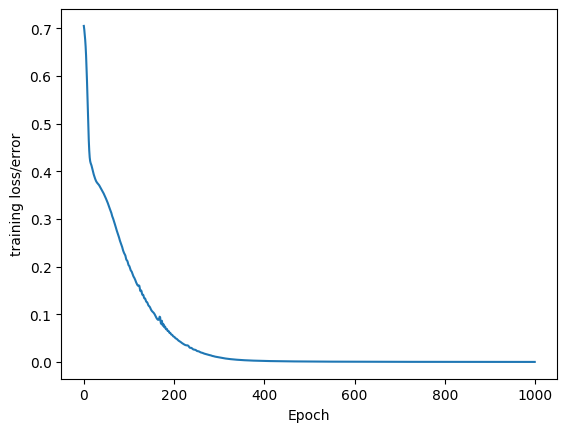

In [ ]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("training loss/error")
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [ ]:
loss

tensor(3.4167)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "No stress"
    elif y_test[i] == 1:
      x = 'Stress'

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

We got 1403 correct!


In [ ]:
accuracy = correct / len(X_test) * 100
print('accuracy: ', accuracy)

accuracy:  78.82022471910113


Zero Shot learning

In [ ]:
!pip install transformers

from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

sequence = "Being s mom is cleaning 24/7 the same shit over and over with the end result with everything being a mess again. momlife kids tired"
labels = ["suicide", "fire", "police", "medical"]

classifier(sequence, labels)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'Being s mom is cleaning 24/7 the same shit over and over with the end result with everything being a mess again. momlife kids tired',
 'labels': ['fire', 'medical', 'police', 'suicide'],
 'scores': [0.6853120923042297,
  0.1371898651123047,
  0.09948113560676575,
  0.07801692932844162]}

In [ ]:
from transformers import pipeline

# Initialize the zero-shot classification pipeline with a specified model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# The fixed sequence
sequence = "speak-no-evil monkey Can I Be Honest With You? globe showing Europe-Africa telephone 03453192666 e-mail clinic.co.uk therapy help NLP CBT hypnotherapy mentalhealth Hertfordshire anxiety stress depression confidence counselling"

# Fixed labels
labels = ["suicide", "fire", "police", "medical", "childcare", "mentalhealth", "war"]

# Custom hypothesis template
custom_template = "This text is about {}."

# Perform classification with the custom hypothesis template
results = classifier(sequence, labels, hypothesis_template=custom_template)
print(results)


{'sequence': 'speak-no-evil monkey Can I Be Honest With You? globe showing Europe-Africa telephone 03453192666 e-mail clinic.co.uk therapy help NLP CBT hypnotherapy mentalhealth Hertfordshire anxiety stress depression confidence counselling', 'labels': ['mentalhealth', 'medical', 'fire', 'police', 'war', 'childcare', 'suicide'], 'scores': [0.8659092783927917, 0.07597646117210388, 0.013996047899127007, 0.012294445186853409, 0.011993767693638802, 0.010933877900242805, 0.008896050974726677]}


In [ ]:
df

,text,labels,tweet_vectors
0,Being s mom is cleaning 24/7 the same shit ove...,1,"[0.052838106, -0.08590956, 0.04215441, 0.01769..."
1,And now we have been given the walkthru book b...,0,"[-0.0037022342, 0.0072014453, -0.022595992, 0...."
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0,"[0.084757544, -0.07600953, -0.042283405, 0.037..."
3,speak-no-evil monkey Can I Be Honest With You...,1,"[0.024447357, -0.05977323, -0.050316934, -0.02..."
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0,"[-0.0026546312, -0.07114221, -0.04708972, -0.0..."
...,...,...,...
8895,Thank you for all your business questions toda...,0,"[-0.047862243, 0.0075260308, -0.0127908075, -0..."
8896,Who is planning on walking their minds today?!...,1,"[-0.026752809, 0.00047889212, 0.039825283, -0...."
8897,no mobile phones Three Tips to Reduce Technos...,1,"[-0.0548675, 0.0049239877, 0.023037888, -0.042..."
8898,purple heart Day 1 purple heart But vets firs...,1,"[-0.054403115, -0.057027694, 0.017296702, -0.0..."


In [ ]:
label_map = {0: 'no_stress', 1: 'stress'}
df['label_text'] = df['labels'].map(label_map)

Few shot learning

In [ ]:
data = df[['text', 'labels', 'label_text']]

data

,text,labels,label_text
0,Being s mom is cleaning 24/7 the same shit ove...,1,stress
1,And now we have been given the walkthru book b...,0,no_stress
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0,no_stress
3,speak-no-evil monkey Can I Be Honest With You...,1,stress
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0,no_stress
...,...,...,...
8895,Thank you for all your business questions toda...,0,no_stress
8896,Who is planning on walking their minds today?!...,1,stress
8897,no mobile phones Three Tips to Reduce Technos...,1,stress
8898,purple heart Day 1 purple heart But vets firs...,1,stress


In [ ]:
!pip install setfit

from sentence_transformers.losses import CosineSimilarityLoss
from setfit import SetFitModel, SetFitTrainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (41

In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,labels,label_text
0,Being s mom is cleaning 24/7 the same shit ove...,1,stress
1,And now we have been given the walkthru book b...,0,no_stress
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0,no_stress
3,speak-no-evil monkey Can I Be Honest With You...,1,stress
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0,no_stress
...,...,...,...
8895,Thank you for all your business questions toda...,0,no_stress
8896,Who is planning on walking their minds today?!...,1,stress
8897,no mobile phones Three Tips to Reduce Technos...,1,stress
8898,purple heart Day 1 purple heart But vets firs...,1,stress


In [ ]:
from sklearn.model_selection import train_test_split

# Replace 'df' with your actual DataFrame variable name.
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from datasets import Dataset

# Convert the pandas DataFrames to Hugging Face Dataset objects
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

train_ds = train_ds.rename_column("labels", "label")
test_ds = test_ds.rename_column("labels", "label")

# Now you can use train_dataset and test_dataset in the SetFitTrainer or other Hugging Face functions


In [ ]:
!nvidia-smi

Mon Apr 15 04:15:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0              29W /  70W |   4567MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch

# Set the device to GPU (cuda) if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move your model to the device (GPU if available, CPU otherwise)


SetFitModel(model_body=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
), model_head=LogisticRegression(), multi_target_strategy=None, normalize_embeddings=False, labels=None, model_card_data=SetFitModelCardData(language=None, license=None, tags=['setfit', 'sentence-transformers', 'text-classification', 'generated_from_setfit_trainer'], model_name='SetFit with sentence-transformers/paraphrase-mpnet-base-v2', model_id=None, dataset_name=None, dataset_id=None, dataset_revision=None, task_name=None, st_id='sentence-transformers/paraphrase-mpnet-base-v2', hyperparameters={'batch_size': (1, 1), 'num_epochs': (1, 1), 'max_step

In [ ]:
import os

# Tell PyTorch to use the GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Assuming you're using a single-GPU setup like Colab

# Then create your trainer and train
trainer = SetFitTrainer(
    model=model,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    loss_class=CosineSimilarityLoss,
    batch_size=1,
    num_iterations=2,
    num_epochs=1
)


<ipython-input-41-a24be3c73cd5>:7: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(


Map:   0%|          | 0/6230 [00:00<?, ? examples/s]

In [ ]:
# Train and evaluate!
trainer.train()
metrics = trainer.evaluate()


In [ ]:
# Push model to the Hub
# Make sure you're logged in with huggingface-cli login first
trainer.push_to_hub("stress-tweet-model")
